In [1]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import xgboost as xgb

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from scipy.stats import randint

In [5]:
df_train = pd.read_pickle("../data/pkl/X_PREPROC_ADVANCED_TEAM_ALL")
df_target = pd.read_pickle("../data/pkl/y_ADVANCED_TEAM_ALL")

In [166]:
df_train

,NET_RATING_Roll_mean_h,OFF_RATING_Roll_median_h,DEF_RATING_Roll_median_h,NET_RATING_Roll_median_h,TM_TOV_PCT_Roll_median_h,EFG_PCT_Roll_median_h,TS_PCT_Roll_median_h,POSS_Roll_median_h,OFF_RATING_Roll_std_h,DEF_RATING_Roll_std_h,...,OKC_a,ORL_a,PHI_a,PHX_a,POR_a,SAC_a,SAS_a,TOR_a,UTA_a,WAS_a
0,0.382353,0.479167,0.537205,0.439065,0.447674,0.445578,0.460145,0.600000,0.460567,0.147198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.308415,0.532197,0.620690,0.405676,0.482558,0.527211,0.601449,0.733333,0.723678,0.425281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.384804,0.501894,0.477314,0.472454,0.389535,0.500000,0.474638,0.500000,0.395309,0.134567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.517565,0.615530,0.535390,0.405676,0.261628,0.595238,0.561594,0.733333,0.234960,0.361292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.406046,0.515152,0.615245,0.230384,0.383721,0.496599,0.423913,0.633333,0.467503,0.419964,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,0.533097,0.536765,0.472000,0.360215,0.351648,0.530534,0.553279,0.527778,0.437692,0.517513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5882,0.661947,0.740809,0.564800,0.648746,0.351648,0.530534,0.655738,0.611111,0.478922,0.202311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5883,0.391504,0.573529,0.651200,0.302867,0.296703,0.320611,0.397541,0.666667,0.285387,0.334836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5884,0.571327,0.678309,0.601600,0.577061,0.478022,0.564885,0.573770,0.611111,0.271794,0.295103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
columns_drop = ['OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a', 'AST_PCT_Roll_std_h',
 'AST_PCT_Roll_median_a',
 'REB_PCT_Roll_std_h',
 'TM_TOV_PCT_Roll_std_h',
 'AST_PCT_Roll_std_a',
 'OREB_PCT_Roll_median_h',
 'OREB_PCT_Roll_std_a',
 'EFG_PCT_Roll_std_h',
 'POSS_Roll_std_a',
 'AST_TOV_Roll_median_h',
 'OREB_PCT_Roll_median_a',
 'AST_PCT_Roll_mean_a',
 'OREB_PCT_Roll_std_h',
 'AST_TOV_Roll_std_a',
 'PACE_Roll_std_h',
 'DREB_PCT_Roll_std_h',
 'REB_PCT_Roll_median_h',
 'PACE_Roll_median_h',
 'TS_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'POSS_Roll_mean_h',
 'AST_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_a',
 'DREB_PCT_Roll_median_h',
 'EFG_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'OFF_RATING_Roll_mean_h']

In [8]:
df_train = df_train.drop(columns_drop, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, random_state=0, test_size=0.3)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.transform(np.array(y_test).reshape(-1, 1))

In [25]:
y_train

array([[0.58156028],
       [0.36879433],
       [0.67375887],
       ...,
       [0.59574468],
       [0.34042553],
       [0.59574468]])

In [18]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

In [19]:
xg_model = XGBRegressor(subsample= 0.39, reg_lambda= 0.028299,reg_alpha=0.033299, objective= 'reg:pseudohubererror', n_estimators= 650, max_depth=32, 
                        learning_rate = 0.021399, huber_slope=4.56, n_jobs=-1)

In [20]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, huber_slope=4.56,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.021399, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=32,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=650, n_jobs=-1,
             num_parallel_tree=None, objective='reg:pseudohubererror', ...)

In [21]:
cross_val_score(xg_model, X_train, y_train, cv=5)

array([0.45810264, 0.50933166, 0.47499797, 0.4490659 , 0.51383483])

In [38]:
r2_score(y_test, xg_model.predict(X_test))

0.4751805564300373

In [35]:
y_test.ravel()

array([0.53191489, 0.53900709, 0.39716312, ..., 0.43971631, 0.53900709,
       0.53191489])

In [28]:
rmse = mean_squared_error(y_test, xg_model.predict(X_test), squared=False)
rmse

0.07359916379221514

In [29]:
import seaborn as sns

<Axes: ylabel='Count'>

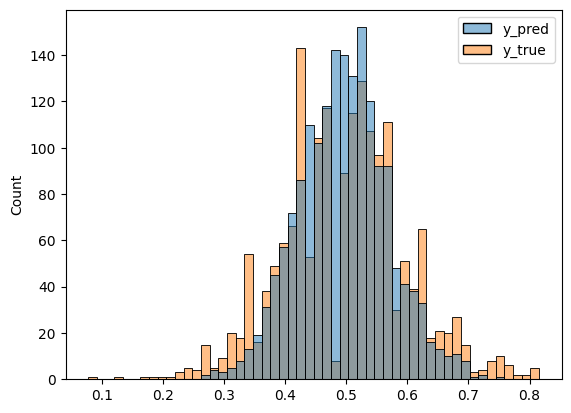

In [36]:
sns.histplot(pd.DataFrame({'y_pred':xg_model.predict(X_test), 'y_true':y_test.ravel()}))

In [132]:
df_pinnacle = pd.read_csv('../data/csv/pinnacle_sportsbook.csv')

In [133]:
df_pinnacle_spread = df_pinnacle[['participant id', 'description', 'decimal odds', 'american odds', 'spread / total']]

In [134]:
df_pinnacle_names = df_pinnacle[['participants.1.participant id', 'participants.1.source.nickname',
       'participants.1.source.short name', 'participants.2.participant id',
       'participants.2.source.nickname', 'participants.2.source.short name']]

In [135]:
df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['p2_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names['p1_full'] = df_pinnacle_names['p1_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p1_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p2_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]

/tmp/ipykernel_13827/3300031709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
/tmp/ipykernel_13827/3300031709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
/tmp/ipykernel_13827/3300031709.py:3: SettingWithCopyW

In [141]:
full_names_participant = df_pinnacle_names.drop_duplicates('participants.1.participant id')

In [144]:
full_names_participant['participant id'] = full_names_participant['participants.1.participant id']

/tmp/ipykernel_13827/274799569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['participant id'] = full_names_participant['participants.1.participant id']


In [149]:
full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']

/tmp/ipykernel_13827/3254063149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']


In [152]:
full_temp = full_names_participant[['participant id','TEAM_NAME']]

In [163]:
full_name_abb = pd.merge(full_temp, df_teamnames, on='TEAM_NAME').drop_duplicates('participant id')

In [165]:
full_name_abb.to_pickle('../data/pkl/sbr_participant_id_name.pkl')

In [ ]:
'Team Durant East Team Durant East', 'Team LeBron  LeBron',
       'Team LeBron LeBron', 'Team World World', 'Team Giannis Giannis','nan'

In [153]:
df_teamnames

,TEAM_NAME,TEAM_ABBREVIATION
0,Atlanta Hawks,ATL
1,Atlanta Hawks,ATL
2,Atlanta Hawks,ATL
3,Atlanta Hawks,ATL
4,Atlanta Hawks,ATL
...,...,...
426,Charlotte Hornets,CHA
427,Charlotte Hornets,CHA
428,Charlotte Hornets,CHA
429,Charlotte Hornets,CHA


In [171]:
df_nba = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [175]:
df_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM'],
      dtype='object')